In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.decomposition import PCA



In [ ]:
#load the data sets

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Untitled folder/wine reviews.csv')
df.head()

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs


In [ ]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,1.885000e+03,626.000000,2445.000000
mean,1.012564e+08,1.282748,4.690798
std,2.603952e+07,2.906256,0.843344
min,2.188283e+06,0.000000,1.000000
25%,9.674479e+07,0.000000,5.000000
50%,1.027956e+08,0.000000,5.000000
75%,1.038206e+08,1.000000,5.000000
max,1.909811e+08,29.000000,5.000000


In [ ]:
df.shape


(2890, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2890 non-null   object 
 1   asins                 870 non-null    object 
 2   brand                 2825 non-null   object 
 3   categories            2890 non-null   object 
 4   dateAdded             2890 non-null   object 
 5   dateUpdated           2890 non-null   object 
 6   descriptions          2738 non-null   object 
 7   dimension             1838 non-null   object 
 8   ean                   2166 non-null   object 
 9   flavors               151 non-null    object 
 10  keys                  2890 non-null   object 
 11  manufacturer          849 non-null    object 
 12  manufacturerNumber    2457 non-null   object 
 13  name                  2890 non-null   object 
 14  reviews.date          2552 non-null   object 
 15  reviews.dateAdded    

In [ ]:
n = df.brand.nunique()
print(n)

193


In [ ]:

# define function to parse json from csv column of description
def parse_json(row):
    if pd.isnull(row):
        return [], [], ""
    elif isinstance(row, str):
        try:
            # Parse the JSON data
            json_data = json.loads(row)
            # Extract the desired values
            date_seen = json_data[0].get("dateSeen", [])
            source_urls = json_data[0].get("sourceURLs", [])
            value = json_data[0].get("value", "")
            return date_seen, source_urls, value
        except json.JSONDecodeError:
            # Handle strings that are not valid JSON
            return [], [], ""
    else:
        # Handle non-string, non-null data types (like float)
        return [], [], ""

# Apply the function to the 'description' column and create new columns for the extracted data
df[['dateSeen', 'sourceURLs', 'value']] = df['descriptions'].apply(lambda row: pd.Series(parse_json(row)))

# Now the 'dateSeen', 'sourceURLs', and 'value' columns in your dataframe contain the extracted data
print(df[['dateSeen', 'sourceURLs', 'value']].head())


                                            dateSeen  \
0                                                 []   
1  [2017-12-21T05:43:00.000Z, 2017-12-16T19:47:00...   
2                                                 []   
3                                                 []   
4  [2017-12-21T05:43:00.000Z, 2017-12-16T19:46:00...   

                                          sourceURLs  \
0                                                 []   
1  [http://redsky.target.com/v1/plp/search?kwr=y&...   
2                                                 []   
3                                                 []   
4  [http://redsky.target.com/v1/plp/search?kwr=y&...   

                                               value  
0                                                     
1  Wine Beverage With Natural Flavors. A Little S...  
2                                                     
3                                                     
4  Add A Sweet, Luscious Flavor Profile To Your W..

In [ ]:
df['reviews.doRecommend'].head(100)

0     True
1     True
2     True
3     True
4     True
      ... 
95    True
96     NaN
97     NaN
98     NaN
99     NaN
Name: reviews.doRecommend, Length: 100, dtype: object

In [ ]:
# one-hot encoding to the 'brand' and 'categories' columns
df = pd.get_dummies(df, columns=['brand', 'categories'], drop_first=True)

# map out binary columns
df['DidPurchase'] = df['reviews.didPurchase'].map({'True': 1, pd.NA: 0})
df['DoRecommend'] = df['reviews.doRecommend'].map({'True': 1, pd.NA: 0})

# normalize num helpful and fill na values
df['NumHelpful'] = df['reviews.numHelpful'].fillna(0) / df['reviews.numHelpful'].max()


# Use TF-IDF for the value column
tfidf = TfidfVectorizer(max_features=100)  # Limit to top 100 features to avoid overfitting
tfidf_features = tfidf.fit_transform(df['value'].fillna(''))  # Fill NaNs with empty string

# Create a new DataFrame for TF-IDF features with rows corresponding to the index of the original DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf.get_feature_names_out(), index=df.index)

# Concatenate the original DataFrame 'df' with the new 'tfidf_df'
df = pd.concat([df, tfidf_df], axis=1)


KeyError: "None of [Index(['brand', 'categories'], dtype='object')] are in the [columns]"

In [ ]:
# fill na values for didpurchase and dorecommend
df['DidPurchase'] = df['DidPurchase'].fillna(0)
df['DoRecommend'] = df['DoRecommend'].fillna(0)

In [ ]:
df.head()

,id,asins,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,keys,manufacturer,...,treatment,used,variety,we,wind,wine,with,you,young,your
0,AV13ClKCGV-KLJ3akN68,NaN,2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,"492130001994,gallo/13312834",NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,AV13CsvW-jtxr-f38AQO,NaN,2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,"freshcraft/50392800,083120003441",NaN,...,0.0,0.0,0.0,0.0,0.0,0.859178,0.190541,0.299955,0.0,0.000000
2,AV13CVI_glJLPUi8O7Po,NaN,2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,"082896001453,1000stories/50399893",NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,AV13CVI_glJLPUi8O7Po,NaN,2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,"082896001453,1000stories/50399893",NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,AV13CYL4-jtxr-f37_-t,NaN,2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,"winecube153/14831433,085200600465",NaN,...,0.0,0.0,0.0,0.0,0.0,0.755375,0.069800,0.000000,0.0,0.084032


In [ ]:
# Download NLTK packages
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# fill na values with mean and blanks
df['reviews.rating'] = df['reviews.rating'].fillna(df['reviews.rating'].mean())
df['reviews.text'] = df['reviews.text'].fillna('')

# Convert to string if not already
df['reviews.text'] = df['reviews.text'].astype(str)


In [ ]:
# Function to preprocess text
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    words = text.lower().split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# text preprocessing
df['reviews.text'] = df['reviews.text'].apply(preprocess_text)


In [ ]:
# Setup for combined processing of numeric and text data
preprocessor = ColumnTransformer(
    transformers=[
        ('txt', TfidfVectorizer(), 'reviews.text'),
        ('num', StandardScaler(), ['reviews.rating'])
    ])

# Transform the data
X = preprocessor.fit_transform(df)


In [ ]:
# Define and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
clusters = dbscan.fit_predict(X)

# Adding cluster labels to the DataFrame
df['Cluster'] = clusters


In [ ]:
# Evaluate clusters (Silhouette Score)
if len(np.unique(clusters)) > 1:  # Silhouette score is only valid if there are more than one cluster
    print('Silhouette Score:', silhouette_score(X, clusters))
else:
    print('Only one cluster detected. Try adjusting DBSCAN parameters.')


Silhouette Score: -0.14862709434717553


In [ ]:
# Analyze the clusters
print(df.groupby('Cluster')['reviews.rating'].mean())


Cluster
-1    4.689455
 0    4.000000
 1    5.000000
 2    5.000000
 3    5.000000
 4    5.000000
 5    4.862577
 6    4.752638
Name: reviews.rating, dtype: float64


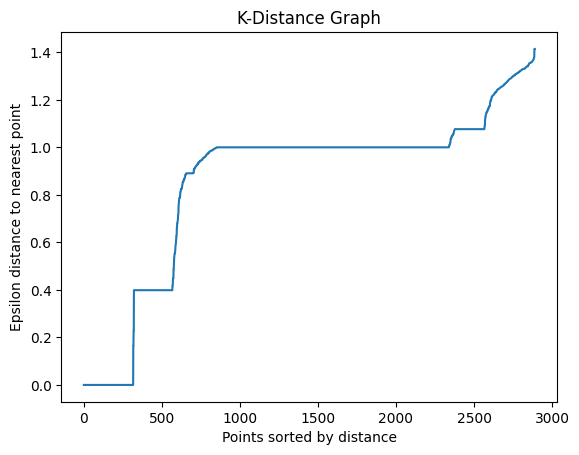

In [ ]:
#plot distance to find optimal eps

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distance values by the distance to the nearest neighbor
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance to nearest point')
plt.show()


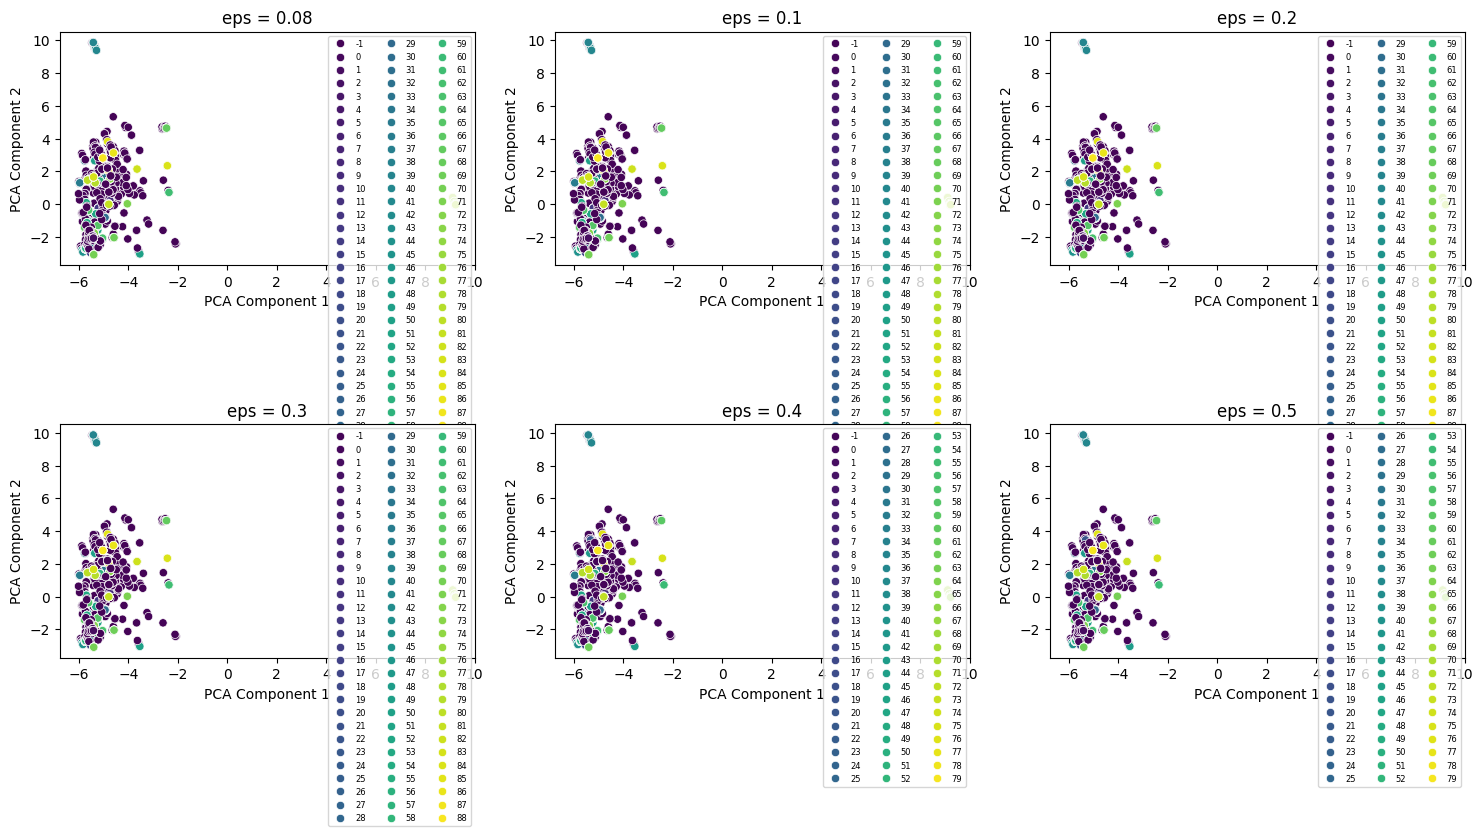

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Apply PCA to reduce to two dimensions for viz
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Testing different EPS values
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()  # To handle the 2D structure of axs
EPS = [0.08, 0.1, 0.2, 0.3, 0.4, 0.5]

for i, eps in enumerate(EPS):
    db = DBSCAN(eps=eps, min_samples=5).fit(X_scaled)
    labels = db.labels_
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], ax=axs[i], hue=pd.Categorical(labels), palette="viridis")
    axs[i].set_title(f"eps = {eps}")
    axs[i].legend(loc='upper right', ncol=3, prop={'size': 6})
    axs[i].set_xlabel('PCA Component 1')
    axs[i].set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


In [ ]:
# Define and fit the DBSCAN model
dbscan = DBSCAN(eps=1.0, min_samples=5, metric='euclidean')
clusters = dbscan.fit_predict(X)

# Adding cluster labels to the DataFrame
df['Cluster'] = clusters


In [ ]:
# Evaluate clusters (Silhouette Score)
if len(np.unique(clusters)) > 1:  # Silhouette score is only valid if there are more than one cluster
    print('Silhouette Score:', silhouette_score(X, clusters))
else:
    print('Only one cluster detected. Try adjusting DBSCAN parameters.')


Silhouette Score: -0.07991598120709442


In [ ]:


# Convert Rating to float
df['Rating'] = df['reviews.rating'].astype(float)

# Combine all the preprocessed columns including the TF-IDF features from 'tfidf_df'
X_numerical = df[['DidPurchase', 'DoRecommend', 'NumHelpful', 'Rating']]

# Normalize the numerical features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X_numerical)

# Convert the scaled numerical features back to a DataFrame
X_scaled_numerical_df = pd.DataFrame(X_scaled_numerical, index=df.index, columns=X_numerical.columns)

# Combine the scaled numerical data with the TF-IDF features
X_combined = pd.concat([X_scaled_numerical_df, tfidf_df], axis=1)

# Run DBSCAN using optimal eps from above
dbscan = DBSCAN(eps=0.8, min_samples=75, metric='euclidean')
clusters = dbscan.fit_predict(X_combined)

# Add the cluster labels to original DataFrame
df['Cluster'] = clusters



In [ ]:
# Analyze the clusters
print(df.groupby('Cluster')['reviews.rating'].mean())


Cluster
-1    4.382932
 0    4.954054
 1    5.000000
 2    4.923889
 3    4.877112
 4    4.993558
Name: reviews.rating, dtype: float64


In [ ]:
# Evaluate clusters (Silhouette Score)
if len(np.unique(clusters)) > 1:  # Silhouette score is only valid if there are more than one cluster
    print('Silhouette Score:', silhouette_score(X_combined, clusters))
else:
    print('Only one cluster detected. Try adjusting DBSCAN parameters.')


Silhouette Score: 0.41624732136427556


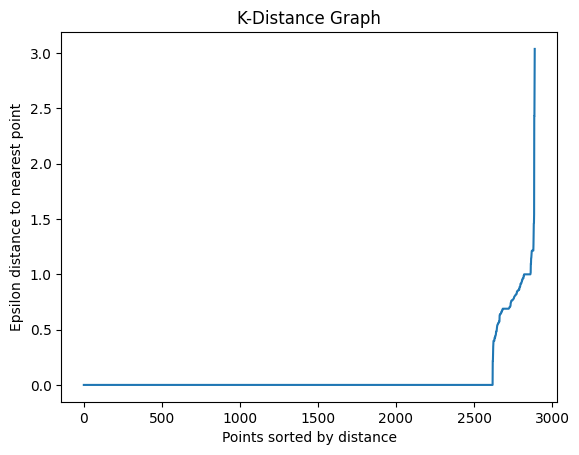

In [ ]:


neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_combined)
distances, indices = neighbors_fit.kneighbors(X_combined)

# Sort distance values by the distance to the nearest neighbor
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance to nearest point')
plt.show()


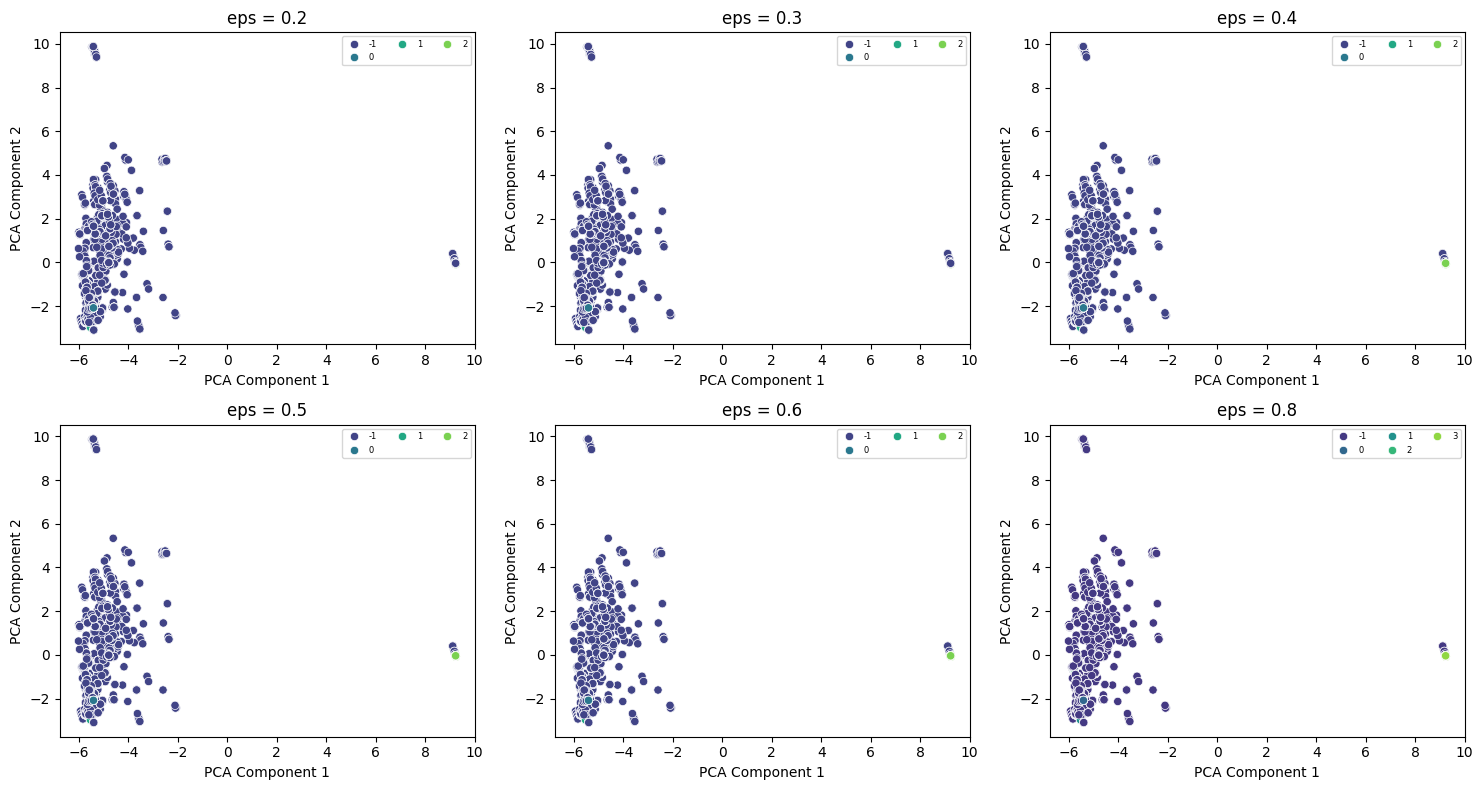

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Apply PCA to reduce to two dimensions for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot with different 'eps' values
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()  # To handle the 2D structure of axs
EPS = [0.2, 0.3, 0.4, 0.5, 0.6, 0.8]

for i, eps in enumerate(EPS):
    db = DBSCAN(eps=eps, min_samples=75).fit(X_scaled)
    labels = db.labels_
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], ax=axs[i], hue=pd.Categorical(labels), palette="viridis")
    axs[i].set_title(f"eps = {eps}")
    axs[i].legend(loc='upper right', ncol=3, prop={'size': 6})
    axs[i].set_xlabel('PCA Component 1')
    axs[i].set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

In [ ]:
# get cluster counds
cluster_counts = df['Cluster'].value_counts().sort_index()
print(cluster_counts)


Cluster
-1    1388
 0     249
 1      85
 2     130
 3      78
 4     960
Name: count, dtype: int64


In [ ]:
df.to_csv('cluster_v2.csv')